In [1]:
import torch
import json

In [2]:
with open('/p/lustre1/ranganath2/fast.tmp/DENV2/EGNN-20240821-133932-872236-16ci7qwd-RANDOM-FINETUNE/denv2_test/cosine.json') as f:
    results = json.load(f)


In [3]:
values = [(id, result) for id,result in results.items()]

In [4]:
import pandas as pd
from atomsci.ddm.pipeline import chem_diversity as cd
from atomsci.ddm.utils.struct_utils import base_smiles_from_smiles



f_from = '../data/dengue/denv2/train_test_valid_ids_random.csv'
df2 = pd.read_csv(f_from)
df2 = df2[df2['subset']=='test']
pdbids = set()
for pdbid, result in results.items():
    pdbids.add(int(pdbid.split('_')[0]))
print(pdbids)


{4, 5, 11, 2060, 18, 22, 25, 2078, 2079, 32, 33, 35, 40, 2089, 2090, 2091, 42, 50, 54, 2103, 59, 2108, 2110, 2113, 2115, 2123, 2124, 2127, 2133, 90, 91, 92, 95, 2146, 2147, 101, 2157, 113, 119, 2167, 123, 128, 2179, 2180, 2189, 2191, 2198, 2201, 158, 164, 2212, 168, 175, 2232, 184, 2235, 188, 2248, 2256, 212, 213, 215, 2265, 2271, 228, 2277, 231, 232, 234, 235, 238, 2289, 2291, 255, 258, 2306, 2319, 271, 276, 2337, 2344, 299, 2348, 302, 309, 311, 2360, 2361, 2363, 318, 324, 2372, 327, 2379, 2381, 341, 2396, 2400, 2403, 2406, 2407, 360, 364, 2413, 2415, 2417, 369, 372, 2422, 375, 2424, 2425, 2427, 380, 381, 384, 2440, 2450, 2453, 407, 2463, 415, 2469, 2478, 2482, 436, 439, 2491, 2492, 446, 447, 2495, 2501, 454, 2508, 2513, 466, 472, 2520, 473, 2525, 2528, 2530, 2532, 2534, 2536, 492, 2542, 494, 2545, 2551, 507, 2556, 517, 2567, 533, 542, 544, 545, 548, 552, 2602, 2605, 2612, 569, 2622, 2630, 583, 585, 2637, 2642, 596, 2651, 606, 2655, 611, 2666, 2670, 622, 624, 2671, 625, 2675, 2677, 26

In [5]:
f='../data/dengue/denv2/protease_ligand_prep.csv'
df=pd.read_csv(f)
smiles_list = df['base_rdkit_smiles'][df['id'].isin(pdbids)].tolist()
tans = cd.calc_dist_smiles('ECFP','tanimoto', smiles_list ,None)
print(len(tans))
print(len(smiles_list))

399
399


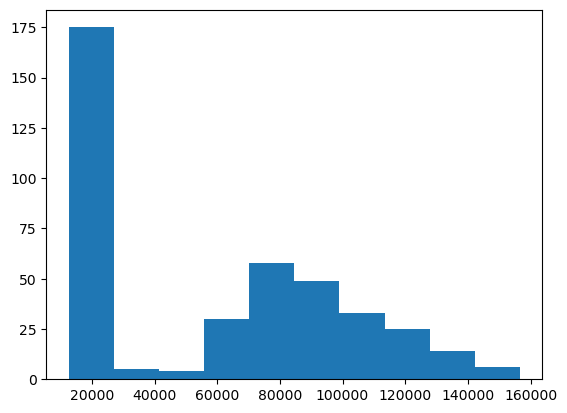

In [6]:
from matplotlib import pyplot as plt
norms = {}
for pdbid, result in values:
    id = pdbid.split('_')[0]
    if not id in norms:
        norms[id] = torch.tensor(result)
    else:
        norms[id] += torch.tensor(result)

for id, norm in norms.items():
    norms[id] = norm/20
    norms[id] = norm.norm()
plt.hist(norms.values())
plt.show()

In [7]:
print(len(norms))

399


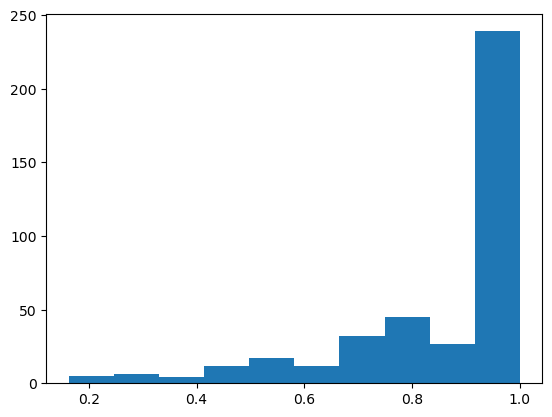

In [8]:
plt.hist([1-tan for tan in tans])
plt.show()

In [9]:
print(smiles_list)

['O=C(N[C@@](C(=O)N[C@](C(=O)N)C(C)(C)C)c1ccc(OCc2ccccc2)cc1)[C@@](NC(=O)c1ccccc1)CCCCN', 'O=C(Nc1cc(C(=O)N)ccc1)[C@@](NC(=O)c1ccc(OCCC(C)C)cc1)c1ccc(OCc2ccccc2)cc1', 'O=C(N[C@](C(=O)NCCc1ccc(C(=O)N)cc1)c1ccc(OCc2ccccc2)cc1)C(O)CCC', 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)Cc1ccccc1', 'O=C(NCCCCCCNC(=N)N)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1', 'O=C(NCCc1ccc(C(=O)O)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1', 'FC(F)(F)c1ccc([C@](NC(=O)CCCCC)C(=O)NCc2ccc(C(=O)N)cc2)cc1', 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(O)cc1', 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccc(C(C)(C)C)cc2)cc1', 'O=C(NCc1cnc(N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1', 'O=C(NCc1ccc(NC(=N)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2cc(OC)ccc2)cc1', 'O=C(NCc1cc(CNC(=N)N)ccc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1', 'O=C(N[C@](C(=O)N)CCCCN)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1', 'S(=O)(=O)(C)c1ccc(NC(=O)[C@@](NC(=O)CCCCC)c2ccc(OCc3ccccc3)cc2)cc1', 'Clc1ccc(S(=O)(=O)N2[C@](C(=O)Nc3sc4c(n3)cc(OC)c(OC)c4)CCC2)

In [10]:
smiles_dict = {}
for smile, grad, tan in zip(smiles_list, norms, tans):
    smiles_dict[smile] = (grad, tan)


In [11]:
print(smiles_dict)

{'O=C(N[C@@](C(=O)N[C@](C(=O)N)C(C)(C)C)c1ccc(OCc2ccccc2)cc1)[C@@](NC(=O)c1ccccc1)CCCCN': ('1148', 0.23076923076923073), 'O=C(Nc1cc(C(=O)N)ccc1)[C@@](NC(=O)c1ccc(OCCC(C)C)cc1)c1ccc(OCc2ccccc2)cc1': ('2018', 0.0), 'O=C(N[C@](C(=O)NCCc1ccc(C(=O)N)cc1)c1ccc(OCc2ccccc2)cc1)C(O)CCC': ('2265', 0.0), 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)Cc1ccccc1': ('318', 0.0), 'O=C(NCCCCCCNC(=N)N)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1': ('2520', 0.0), 'O=C(NCCc1ccc(C(=O)O)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1': ('2306', 0.0), 'FC(F)(F)c1ccc([C@](NC(=O)CCCCC)C(=O)NCc2ccc(C(=O)N)cc2)cc1': ('1510', 0.0), 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(O)cc1': ('1919', 0.0), 'O=C(NCc1ccc(C(=O)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccc(C(C)(C)C)cc2)cc1': ('1327', 0.0), 'O=C(NCc1cnc(N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1': ('569', 0.0), 'O=C(NCc1ccc(NC(=N)N)cc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2cc(OC)ccc2)cc1': ('2078', 0.0), 'O=C(NCc1cc(CNC(=N)N)ccc1)[C@@](NC(=O)CCCCC)c1ccc(OCc2ccccc2)cc1': ('1883', 0.0), '

In [20]:
print(list(norms.values()))

[tensor(54783.6836), tensor(66404.1094), tensor(72771.5469), tensor(14228.2627), tensor(97428.6250), tensor(24593.4629), tensor(14373.1289), tensor(16477.7266), tensor(82610.8438), tensor(16014.5322), tensor(21118.1250), tensor(17105.3535), tensor(59141.4531), tensor(24498.7246), tensor(89503.7266), tensor(70929.8594), tensor(18478.2891), tensor(15558.2568), tensor(72849.4141), tensor(15482.7988), tensor(115033.1484), tensor(60748.1875), tensor(20592.9355), tensor(12683.7412), tensor(70487.3359), tensor(16477.7031), tensor(14300.5996), tensor(19226.2539), tensor(101001.1641), tensor(131059.2969), tensor(57481.3594), tensor(103867.9766), tensor(18150.4258), tensor(75436.5000), tensor(117373.7266), tensor(94698.1953), tensor(142269.9219), tensor(114600.6641), tensor(78108.9453), tensor(98280.1719), tensor(138632.8906), tensor(19310.1465), tensor(22548.5195), tensor(14300.6328), tensor(14664.8086), tensor(78067.6172), tensor(127290.3828), tensor(19903.7559), tensor(80090.3672), tensor(938

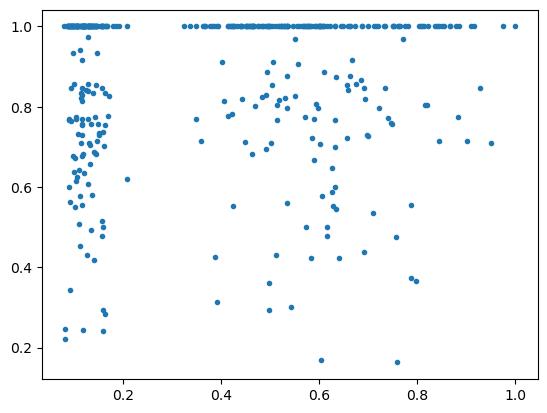

In [27]:
norm_value = max(norms.values())
norm_values = [norm/norm_value for norm in norms.values()]
similarity = [1. - tan for tan in tans]
plt.scatter(norm_values, similarity, marker='.')
# plt.plot([0.2,5000],[0.2, 1],"r--", marker='.' )
plt.show()